In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron

In [2]:
data_train = pd.read_csv("train.csv")
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## preprocess


In [3]:
data_train = data_train.replace(['female','male'],[0,1])
data_train = data_train.replace(['S','C','Q'],[0,1,2])
data_train = data_train.fillna(10)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,10,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,10,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,10,0.0


In [4]:
X_train = np.array(data_train[['Pclass' , 'Sex' , 'Age' , 'SibSp' , 'Parch']])
Y_train = np.array(data_train[['Survived']])

X_train.shape

(891, 5)

In [5]:
model = tf.keras.models.Sequential([
    Dense(5 , activation='sigmoid'),
    Dense(50 , activation='relu'),
    Dense(25 , activation='sigmoid'),
    Dense(2 , activation='softmax'),
])

In [6]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
              loss = tf.losses.sparse_categorical_crossentropy,
              metrics = ['accuracy']
              )

In [7]:
train_output = model.fit(X_train, Y_train ,epochs=200)

Epoch 1/200
28/28 [==============================] - 7s 9ms/step - loss: 0.6645 - accuracy: 0.6162
Epoch 2/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6410 - accuracy: 0.6296
Epoch 3/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6001 - accuracy: 0.6824
Epoch 4/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5482 - accuracy: 0.7430
Epoch 5/200
28/28 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.8081
Epoch 6/200
28/28 [==============================] - 0s 2ms/step - loss: 0.4591 - accuracy: 0.7969
Epoch 7/200
28/28 [==============================] - 0s 2ms/step - loss: 0.4680 - accuracy: 0.8114
Epoch 8/200
28/28 [==============================] - 0s 2ms/step - loss: 0.4465 - accuracy: 0.8171
Epoch 9/200
28/28 [==============================] - 0s 2ms/step - loss: 0.4534 - accuracy: 0.8103
Epoch 10/200
28/28 [==============================] - 0s 2ms/step - loss: 0.4484 - accuracy: 0.8227
Epoch 11/

28/28 [==============================] - 0s 2ms/step - loss: 0.3919 - accuracy: 0.8328
Epoch 84/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3956 - accuracy: 0.8361
Epoch 85/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3981 - accuracy: 0.8339
Epoch 86/200
28/28 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8316
Epoch 87/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3937 - accuracy: 0.8462
Epoch 88/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.8328
Epoch 89/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8272
Epoch 90/200
28/28 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8137
Epoch 91/200
28/28 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8272
Epoch 92/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8227
Epoch 93/200


28/28 [==============================] - 0s 2ms/step - loss: 0.3833 - accuracy: 0.8406
Epoch 165/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.8328
Epoch 166/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3878 - accuracy: 0.8384
Epoch 167/200
28/28 [==============================] - 0s 2ms/step - loss: 0.4012 - accuracy: 0.8283
Epoch 168/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3924 - accuracy: 0.8350
Epoch 169/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3887 - accuracy: 0.8350
Epoch 170/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.8328
Epoch 171/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3828 - accuracy: 0.8384
Epoch 172/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.8451
Epoch 173/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3911 - accuracy: 0.8305
Epoc

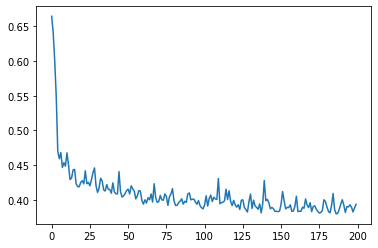

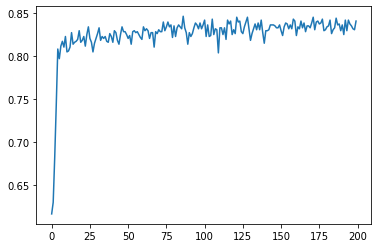

In [8]:
plt.plot(train_output.history['loss'])
plt.show()
plt.plot(train_output.history['accuracy'])
plt.show()

In [9]:
model.save("my_titanic.h5")

In [10]:
data_test = pd.read_csv("test.csv")
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
data_test = data_test.replace(['female','male'],[0,1])
data_test = data_test.replace(['S','C','Q'],[0,1,2])
data_test = data_test.fillna(10)
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,10,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,10,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,10,2
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,10,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,10,0


In [12]:
X_test = np.array(data_train[['Pclass' , 'Sex' , 'Age' , 'SibSp' , 'Parch']])
Y_test = np.array(data_train[['Survived']])

results = model.evaluate(X_test, Y_test)
print("acc : ", results[1])

28/28 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.8429
acc :  0.8428731560707092


## knn

In [14]:
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, Y_train)

Y_pred = knn_model.predict(X_train)
accuracy = accuracy_score(Y_test, Y_pred.round())
accuracy

0.8720538720538721

## MLP advanced

In [15]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, Y_train)
clf.predict_proba(X_test)

clf.predict(X_test)

accuracy = clf.score(X_test, Y_test)
accuracy

c:\users\afshari\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8305274971941639

## Perceptron

In [17]:
p = Perceptron(random_state=42)
p.fit(X_train, Y_train)

Y_pred = p.predict(X_test)
test_score = accuracy_score(Y_test, Y_pred)
print("score on train data: ", test_score)

c:\users\afshari\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score on train data:  0.7968574635241302


## Test

In [18]:
mari= np.array([[1,1,36,0,0]])
result = model.predict(mari)
np.argmax(result)

0